In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

# Estilo mais agradável para plotar gráficos e tabelas
plt.style.use('seaborn-whitegrid')

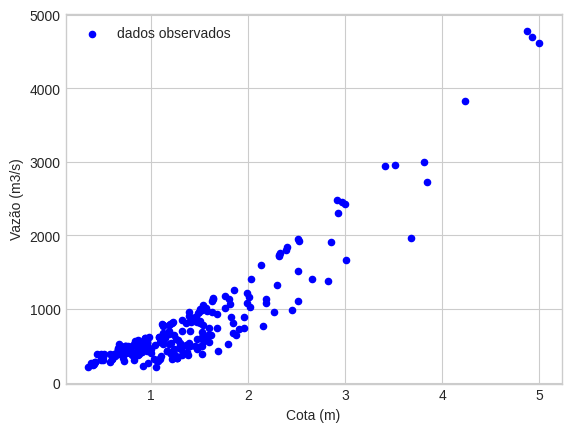

In [2]:
# Carregando os dados do arquivo CSV
# colunas COTA | VAZAO

#dados_csv = pd.read_csv('cota_vazao-54002990.csv', delimiter=';', header=0, on_bad_lines='warn')
#dados_csv = pd.read_csv('cota_vazao-54003000.csv', delimiter=';', header=0, on_bad_lines='warn')
dados_csv = pd.read_csv('trabalho-paula.csv', delimiter=';', header=0, on_bad_lines='warn')

# passando a coluna "COTA" de centímetros para metros
#dados_csv.loc[:,'Cota'] /= 100

# verificando a relação VAZÃO x COTA
dados_csv.plot.scatter(x='Cota', y='Vazao', color='blue', label='dados observados')
plt.xlabel("Cota (m)")
plt.ylabel("Vazão (m3/s)")
plt.legend()
plt.show()


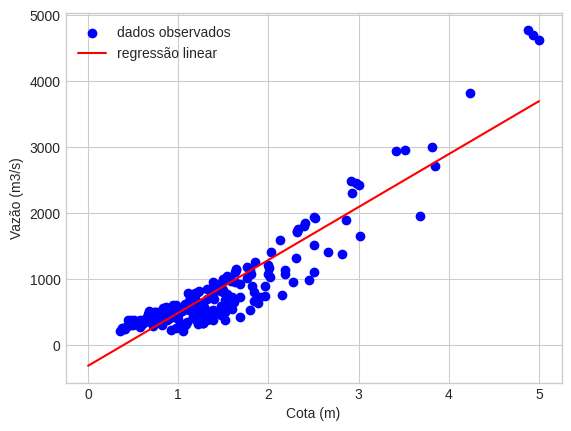

0.8447066394334781
1572.5087095196982


In [4]:
# Regressão Linear

x_l = dados_csv.Cota.to_numpy()
y_l = dados_csv.Vazao.to_numpy()

modelo_linear = np.poly1d(np.polyfit(x_l, y_l, 1))
x_modelo = np.linspace(0, 5)

plt.scatter(x_l, y_l, color = 'blue', label='dados observados')
plt.plot(x_modelo, modelo_linear(x_modelo), color = 'red', label='regressão linear')
plt.xlabel("Cota (m)")
plt.ylabel("Vazão (m3/s)")
plt.legend()
plt.show()

# Verificando a qualidade do modelo
from sklearn.metrics import r2_score
print(r2_score(y_l, modelo_linear(x_l)))
q = modelo_linear(2.35)
print(q)

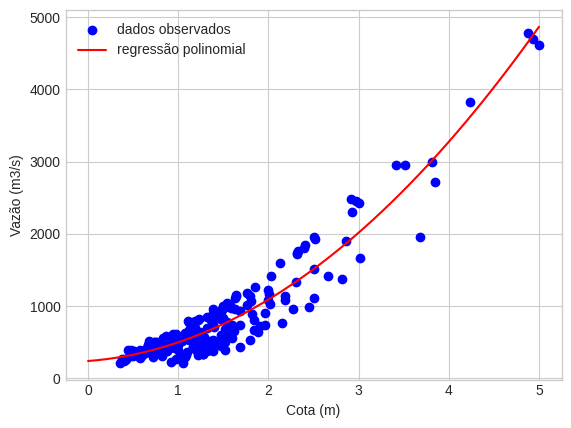

0.9177221634423032
1376.1301690013893


In [36]:
# Regressão Polinomial

x_p = dados_csv.Cota.to_numpy()
y_p = dados_csv.Vazao.to_numpy()

modelo_poli = np.poly1d(np.polyfit(x_p, y_p, 2))
x_modelo = np.linspace(0, 5)

plt.scatter(x_p, y_p, color = 'blue', label='dados observados')
plt.plot(x_modelo, modelo_poli(x_modelo), color = 'red', label='regressão polinomial')
plt.xlabel("Cota (m)")
plt.ylabel("Vazão (m3/s)")
plt.legend()
plt.show()

# Verificando a qualidade do modelo
from sklearn.metrics import r2_score
print(r2_score(y_p, modelo_poli(x_p)))
q = modelo_poli(2.35)
print(q)

In [55]:
#from sklearn.isotonic import IsotonicRegression

#x_ir = dados_csv.Cota.to_numpy()
#y_ir = dados_csv.Vazao.to_numpy()
#ir_modelo = IsotonicRegression(out_of_bounds="clip")
#y_modelo = ir_modelo.fit_transform(x_ir, y_ir)
#x_modelo = np.linspace(0, 5)

#plt.scatter(x_ir, y_ir, color = 'blue', label='dados observados')
#plt.plot(x_modelo, ir_modelo.predict(x_modelo), color = 'red', label='regressão isotônica')
#plt.xlabel("Cota (m)")
#plt.ylabel("Vazão (m3/s)")
#plt.legend()
#plt.show()

#ir_modelo.score(x_iso, y_iso)